In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

In [3]:
df = pd.read_csv("diabetes.csv")
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


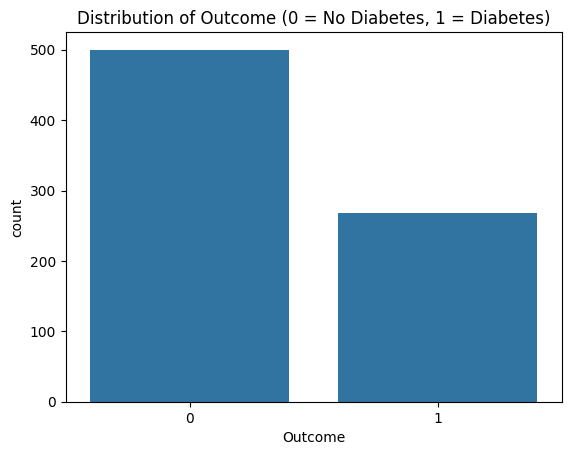

In [6]:
sns.countplot(x='Outcome', data=df)
plt.title("Distribution of Outcome (0 = No Diabetes, 1 = Diabetes)")
plt.show()

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.5, random_state=48)

In [12]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [14]:
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {acc:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Model Accuracy: 0.7839
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       251
           1       0.70      0.65      0.68       133

    accuracy                           0.78       384
   macro avg       0.76      0.75      0.76       384
weighted avg       0.78      0.78      0.78       384



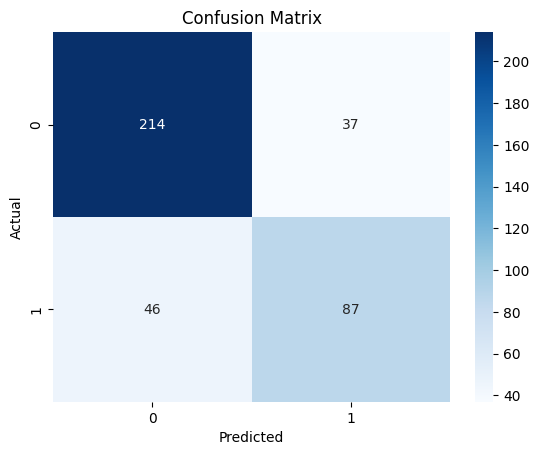

In [15]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [16]:
joblib.dump(model, "diabetes_model.pkl")
print("Model saved as diabetes_model.pkl")

Model saved as diabetes_model.pkl
